# Compressão de imagem

### Import das bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import sys


Função de compressão usando RLE + Huffman

In [2]:
def encode(img):
    rleImg = rleEncode(img)
    huffmanImg = huffmanEncode(rleImg)
    return huffmanImg

def rleEncode(img):
    rleImg = []
    for row in img:
        currentItem = [256, 256, 256]
        rleRow = []
        for pix in row:
            if not((pix == currentItem).all()):
                currentItem = pix
                rleRow.append([1, currentItem])
            else:
                rleRow[-1][0]+=1
        rleImg.append(rleRow)
    return rleImg
    
def colorCount(img):
    colors = []
    for row in img:
        for list in row:
            found = False
            for color in colors:
                comparison = color[1]==list[1]
                if comparison.all():
                    color[0] += list[0]
                    found = True
                    break
            if not(found):
                colors.append([list[0], list[1]])
    return colors

def huffmanEncode(img):
    colorsCount = sorted(colorCount(img))
    colorsCoded = []
    for color in colorsCount:
        code = len(colorsCount) - colorsCount.index(color) -1
        colorsCoded.append([code, color[1]])
    imgCoded = []
    for row in img:
        rowCoded = []
        for pix in row:
            for color in colorsCoded:
                if(pix[1]==color[1]).all():
                    rowCoded.append([color[0], pix[0]])
                    break
        imgCoded.append(rowCoded)
    return [imgCoded, colorsCoded]


# Execução do código

Imagem sem compressão:

[[  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [  0 162 232]
 [237  28  36]
 [237  28  36]
 [237  28  36]
 [237  28  36]
 [237  28  36]
 [237  28  36]
 [237  28  36]
 [237  28  36]
 [237  28  36]
 [237  28  36]
 [237  28  36]
 [237  28  36]
 [237  28 

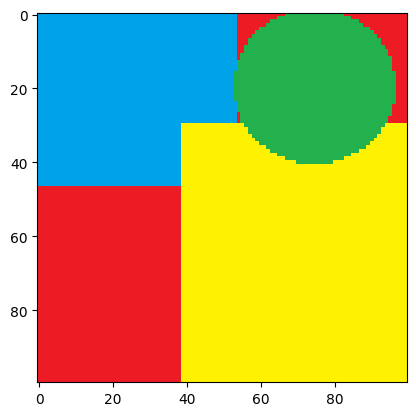

In [3]:
img = np.array(Image.open("image.bmp"))
with open("uncompressed.txt", "w") as txt_file:
    txt_file.write("[")
    for line in img:
        txt_file.write("[")
        for item in line:
            txt_file.write(f"[{item[0]}, {item[1]}, {item[2]}],")
        txt_file.write("],\n") 
    txt_file.write("]")

plt.imshow(img)
print(img[0])


In [4]:
rleImg = rleEncode(img)
with open("rleCompressed.txt", "w") as txt_file:
    txt_file.write("[")
    for line in rleImg:
        txt_file.write("[")
        for item in line:
            txt_file.write(f"[{item[0]}, [{item[1][0]}, {item[1][1]}, {item[1][2]}]],")
        txt_file.write("],\n") # works with any number of elements in a line
    txt_file.write("]")
print(rleImg[0])

[[54, array([  0, 162, 232], dtype=uint8)], [13, array([237,  28,  36], dtype=uint8)], [16, array([ 34, 177,  76], dtype=uint8)], [17, array([237,  28,  36], dtype=uint8)]]


In [ ]:
print(rleImg)

In [5]:
huffmanImg = huffmanEncode(rleImg)
with open("huffmanCompressed.txt", "w") as txt_file:
    txt_file.write("[[")
    for line in huffmanImg[0]:
        txt_file.write("[")
        for item in line:
            txt_file.write(f"[{item[0]}, {item[1]}],")
        txt_file.write("],\n[")
    for item in huffmanImg[1]:
        txt_file.write(f"[{item[0]}, [{item[1][0]}, {item[1][1]}, {item[1][2]}]],")
    txt_file.write("]]")
print(huffmanImg)

[[[[2, 54], [1, 13], [3, 16], [1, 17]], [[2, 54], [1, 11], [3, 20], [1, 15]], [[2, 54], [1, 9], [3, 24], [1, 13]], [[2, 54], [1, 8], [3, 26], [1, 12]], [[2, 54], [1, 6], [3, 30], [1, 10]], [[2, 54], [1, 5], [3, 32], [1, 9]], [[2, 54], [1, 4], [3, 34], [1, 8]], [[2, 54], [1, 3], [3, 36], [1, 7]], [[2, 54], [1, 3], [3, 36], [1, 7]], [[2, 54], [1, 2], [3, 38], [1, 6]], [[2, 54], [1, 2], [3, 39], [1, 5]], [[2, 54], [1, 1], [3, 40], [1, 5]], [[2, 54], [1, 1], [3, 41], [1, 4]], [[2, 54], [3, 42], [1, 4]], [[2, 54], [3, 42], [1, 4]], [[2, 54], [3, 42], [1, 4]], [[2, 53], [3, 44], [1, 3]], [[2, 53], [3, 44], [1, 3]], [[2, 53], [3, 44], [1, 3]], [[2, 53], [3, 44], [1, 3]], [[2, 53], [3, 44], [1, 3]], [[2, 53], [3, 44], [1, 3]], [[2, 53], [3, 44], [1, 3]], [[2, 53], [3, 44], [1, 3]], [[2, 54], [3, 43], [1, 3]], [[2, 54], [3, 42], [1, 4]], [[2, 54], [3, 42], [1, 4]], [[2, 54], [1, 1], [3, 41], [1, 4]], [[2, 54], [1, 1], [3, 40], [1, 5]], [[2, 54], [1, 1], [3, 40], [1, 5]], [[2, 39], [0, 17], [3, 

[array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), array([  0, 162, 232], dtype=uint8), 

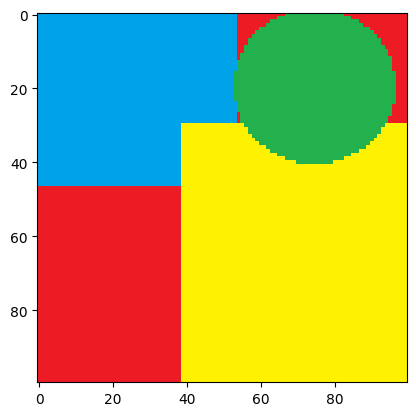

In [6]:
def decode(compressed):
    decodedImg = []
    img = compressed[0]
    table = compressed[1]
    for row in img:
        decodedRow = []
        for pix in row:
            code = pix[0]
            for codes in table:
                if codes[0]==code:
                    color = codes[1]
            for n in range(pix[1]):
                decodedRow.append(color)
        decodedImg.append(decodedRow)
    return decodedImg

decodedImg = decode(huffmanImg)
print(decodedImg[0])
plt.imshow(decodedImg)

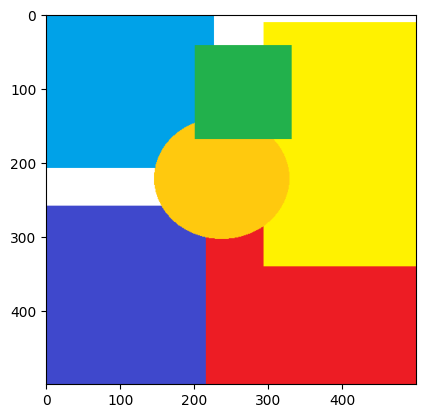

In [7]:
img2 = np.array(Image.open("image2.bmp"))
with open("uncompressed2.txt", "w") as txt_file:
    txt_file.write("[")
    for line in img2:
        txt_file.write("[")
        for item in line:
            txt_file.write(f"[{item[0]}, {item[1]}, {item[2]}],")
        txt_file.write("],\n") 
    txt_file.write("]")

rleImg2 = rleEncode(img2)
with open("rleCompressed2.txt", "w") as txt_file:
    txt_file.write("[")
    for line in rleImg2:
        txt_file.write("[")
        for item in line:
            txt_file.write(f"[{item[0]}, [{item[1][0]}, {item[1][1]}, {item[1][2]}]],")
        txt_file.write("],\n") # works with any number of elements in a line
    txt_file.write("]")

huffmanImg2 = huffmanEncode(rleImg2)
with open("huffmanCompressed2.txt", "w") as txt_file:
    txt_file.write("[[")
    for line in huffmanImg2[0]:
        txt_file.write("[")
        for item in line:
            txt_file.write(f"[{item[0]}, {item[1]}],")
        txt_file.write("],\n[")
    for item in huffmanImg2[1]:
        txt_file.write(f"[{item[0]}, [{item[1][0]}, {item[1][1]}, {item[1][2]}]],")
    txt_file.write("]]")

decodedImg2 = decode(huffmanImg2)
plt.imshow(decodedImg2)

In [8]:
img3 = np.array(Image.open("image3.bmp"))
with open("uncompressed3.txt", "w") as txt_file:
    txt_file.write("[")
    for line in img3:
        txt_file.write("[")
        for item in line:
            txt_file.write(f"[{item[0]}, {item[1]}, {item[2]}],")
        txt_file.write("],\n") 
    txt_file.write("]")

rleImg3 = rleEncode(img3)
with open("rleCompressed3.txt", "w") as txt_file:
    txt_file.write("[")
    for line in rleImg3:
        txt_file.write("[")
        for item in line:
            txt_file.write(f"[{item[0]}, [{item[1][0]}, {item[1][1]}, {item[1][2]}]],")
        txt_file.write("],\n") # works with any number of elements in a line
    txt_file.write("]")

huffmanImg3 = huffmanEncode(rleImg3)
with open("huffmanCompressed3.txt", "w") as txt_file:
    txt_file.write("[[")
    for line in huffmanImg3[0]:
        txt_file.write("[")
        for item in line:
            txt_file.write(f"[{item[0]}, {item[1]}],")
        txt_file.write("],\n[")
    for item in huffmanImg3[1]:
        txt_file.write(f"[{item[0]}, [{item[1][0]}, {item[1][1]}, {item[1][2]}]],")
    txt_file.write("]]")

decodedImg3 = decode(huffmanImg3)
plt.imshow(decodedImg3)

KeyboardInterrupt: 